# 통계 패키지 : Numpy, Matplotlib & Scipy 

## 1. Numpy : 리스트나 벡터 만들기 + 기본적인 통계 

* 패키지를 불러올 때는, 항상 import 를 사용한다.

In [1]:
import numpy as np

* 수학 점수
    * 100
    * 92
    * 88
    * 95
    * 70
    * 82
    * 53
    * 92

In [2]:
score = np.array([100, 92, 88 ,95, 70, 82, 53, 92])

In [3]:
print(score)

[100  92  88  95  70  82  53  92]


In [4]:
score.mean() # 평균

84.0

In [5]:
score.std() # 표준편차

14.5

In [6]:
score.var() # 분산

210.25

## 2. Matplotlib : 그래프 그리기 

In [7]:
import matplotlib.pyplot as plt

* 리스트가 8개이므로 8개의 이름을 리스트로 만들어야 한다.

In [13]:
name = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

In [14]:
name_list = np.array([1, 2, 3, 4, 5, 6, 7, 8])

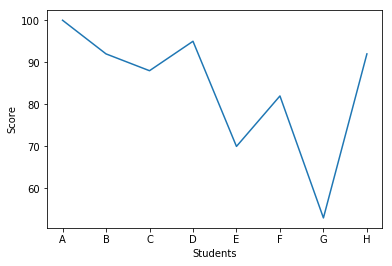

In [16]:
plt.plot(name_list, score)
plt.xticks(name_list, name)
plt.xlabel('Students')
plt.ylabel('Score')
plt.show()

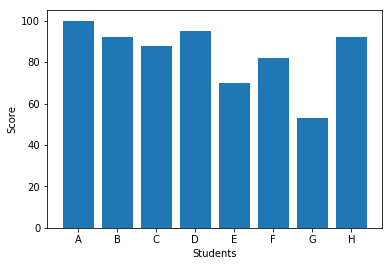

In [17]:
plt.bar(name_list, score)
plt.xticks(name_list, name)
plt.xlabel('Students')
plt.ylabel('Score')
plt.show()

## 3. Scipy : 파이썬의 통계 

In [18]:
import scipy as sp

In [19]:
import scipy.stats as ss

$$ Z = \frac{X - m}{\sigma} $$

In [20]:
# Z 값 구하기
score_z = ss.zscore(score)

In [21]:
print(score_z)

[ 1.10344828  0.55172414  0.27586207  0.75862069 -0.96551724 -0.13793103
 -2.13793103  0.55172414]


In [22]:
# Z값을 확률로 변환
percent_z = ss.norm.cdf(score_z)

<img src='https://i.stack.imgur.com/fGYNp.png' alt='Example'></img>

In [23]:
print(percent_z)

[ 0.86508373  0.70943132  0.608673    0.77596025  0.1671429   0.44514746
  0.01626117  0.70943132]


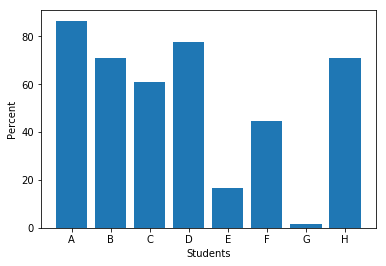

In [24]:
plt.bar(name_list, percent_z * 100)
plt.xticks(name_list, name)
plt.xlabel('Students')
plt.ylabel('Percent')
plt.show()

## Quiz1 : 위의 자료를 바탕으로 모평균을 95%와 99%로 추정하시오. 

In [25]:
score = np.array([100, 92, 88 ,95, 70, 82, 53, 92])

In [26]:
m = score.mean()
sig = score.std()
print(m, sig)

84.0 14.5


$$ \bar{\sigma} = \frac{\sigma}{\sqrt{n}} $$

In [27]:
from math import sqrt

In [28]:
sig = sig/sqrt(len(score))

In [29]:
print(m, sig)

84.0 5.1265241636


In [30]:
# 신뢰구간
inv1 = ss.norm.interval(0.95, m, sig)
print(inv1)

(73.952197273464833, 94.047802726535167)


In [31]:
inv2 = ss.norm.interval(0.99, m, sig)
print(inv2)

(70.794948834041236, 97.205051165958764)


In [33]:
l1 = inv1[1] - inv1[0]
l2 = inv2[1] - inv2[0]
print(l1, l2)

20.0956054531 26.4101023319


## Quiz2 : 주사위를 1200번 던졌을 때, 1이 224번 이상 나올 확률은?

$$ P(X \geq a) = P(Z \geq \frac{a - m}{\sigma}) $$

이항분포 : $ B(n,p) $

In [34]:
n, p = 1200, 1/6

In [35]:
m_bin = ss.binom.mean(n, p)
sig_bin = ss.binom.std(n,p)
print(m_bin, sig_bin)

200.0 12.9099444874


In [36]:
a_bin = (224 - m_bin) / sig_bin
print(a_bin)

1.85903200618


In [37]:
p_bin = ss.norm.cdf(a_bin)
print(p_bin)

0.968488699085


In [38]:
p_bin = 1 - p_bin
print(p_bin)

0.0315113009155


In [39]:
# 그래프그리기
from random import gauss

In [40]:
x = [gauss(m_bin, sig_bin) for i in range(10000)]
y = ss.norm.pdf(x, m_bin, sig_bin)

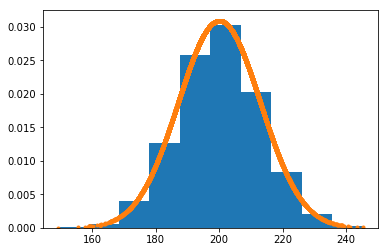

In [42]:
plt.hist(x, normed=True)
plt.plot(x, y, '.')
plt.show()

## Quiz3 : 국어 80점과 수학 70점 중 잘 본 과목은? 

* 국어의 평균은 50점이고, 수학의 평균은 35점이다. 표준편차는 각각 10, 15이다.

In [43]:
def zetify(value, m, std):
    return (value - m)/std

In [44]:
kor = zetify(80, 50, 10)
math = zetify(70, 35, 15)
print(kor, math)

3.0 2.3333333333333335


In [45]:
kor_x = [gauss(50, 10) for i in range(10000)]
math_x = [gauss(35, 15) for i in range(10000)]
kor_y = ss.norm.pdf(kor_x, 50, 10)
math_y = ss.norm.pdf(math_x, 35, 15)

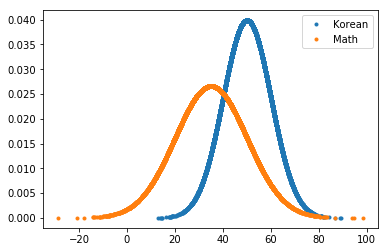

In [47]:
plt.plot(kor_x, kor_y, '.')
plt.plot(math_x, math_y, '.')
plt.legend(['Korean', 'Math'])
plt.show()